# ASSIGNMENT #2 - CLASSIFICATION

ASSIGNMENT DONE BY ,

Name: SRIRANJANI VAIDYANATHAN

Student ID: 801077329

# I. INTRODUCTION

This assignment is about Classification. A classification model attempts to draw some conclusion from observed values. Given one or more inputs a classification model will try to predict the value of one or more outcomes. In short Classification either predicts categorical class labels or classifies data (construct a model) based on the training set and the values (class labels) in classifying attributes and uses it in classifying new data. 

In this assignment we have performed four classification algorithm they are 

1) Pocket Algorithm 

2) Quadratic Discriminant Analysis

3) Linear Discriminant Analysis 

4) Logistic Regression 

Pocket Algorithm: The pocket algorithm solves the stability problem of perceptron learning by keeping the best solution seen so far "in its pocket". The pocket algorithm then returns the solution in the pocket, rather than the last solution.

Quadratic Discriminant Analysis: A quadratic classifier is used in machine learning and statistical classification to separate measurements of two or more classes of objects or events by a quadric surface. It is a more general version of the linear classifier.

Linear Discriminant Analysis: Linear Discriminant Analysis is used in Machine Learning for classification to find a linear combination of features that characterizes or separates two or more classes of objects or events.

Logistic Regression: Logistic regression is named for the function used at the core of the method, the logistic function.
The logistic function, also called the sigmoid function.Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.


The data source from which the data was collected is Kaggle("https://www.kaggle.com/datasets"). The data set used for classification contains data that describes daily weather observations from numerous Australian weather stations.




# II. DATA

## INTRODUCTION OF DATA FOR CLASSIFICATION 

The Data used for regression describes daily weather observations from numerous Australian weather stations. This data set contains 142,000 samples and 24 feature values. 

The information about the columns is described below,

Date                - It is the date of observation.

Location            - The common name of the location of the weather station

MinTemp             - The minimum temperature in degrees celsius

MaxTemp             - The maximum temperature in degrees celsius

Rainfall            - The amount of rainfall recorded for the day in mm

Evaporation         - The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine            - The number of hours of bright sunshine in the day.

WindGustDir         - The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed       - The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am          - Direction of the wind at 9am

WindDir3pm          - Direction of the wind at 3pm

WindSpeed9am        - Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm        - Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am         - Humidity (percent) at 9am

Humidity3pm         - Humidity (percent) at 3pm

Pressure9am         - Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm         - Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am            - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.

Cloud3pm            - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

Temp9am             - Temperature (degrees C) at 9am

Temp3pm             - Temperature (degrees C) at 3pm

RainToday           - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RISK_MM             - The amount of rain. A kind of measure of the "risk".

RainTomorrow        - The target variable. Did it rain tomorrow?


## READING THE DATA

Before we start reading the format we have to import the necessary packages.

In [1]:
#Import Statements.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

We will be creating a data frame that will store the data read from the csv file. 

Data Frame is a data structure representing cases (rows), each of which consists of a number of observations or measurements (columns).

In [2]:
#The dataset is in CSV format. 
df = pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


Inorder to know about the data set we can use describe() which will describe about all the feature values in the data frame df.

In [3]:
#Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In order to know more information about the data set we use info() which will provide information about the type, total number of non null values for all the feature values in the data frame.

In [4]:
#Print a concise summary of a DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

## PREPROCESSING OF THE DATA

So before we start with the visualization we need to preprocess the data so that the data does not have any null values or not a number values. The string values should be converted to numeric values as well.Also we can remove the columns which are not needed. 

Everytime it is safe to create a duplicate for the data frame and make changes in the new data frame. So here I have created a new data frame class_df which has all the data from the data frame df and the preprocessing is done in the data frame class_df.

In [5]:
#Copy the data from the dataframe df to another dataframe class_df.
class_df = df.iloc[:, :].copy()

#Chages are made in the new dataframe class_df.
#The columns that are not required are dropped.
class_df = class_df.drop(columns=['Evaporation', 'Sunshine','Cloud9am', 'Cloud3pm','WindGustDir', 'WindDir9am', 'WindDir3pm', 'RISK_MM'])
np.any(class_df.isnull())
class_df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,Yes,No


There are total of 142,193 samples and removing the rows with na values will result in 119,590 samples which doesnt affect the output to get biased. 

So removing the rows with the null values using dropna() and displaying the data frame X

In [6]:
#The rows which has na values is dropped and the index are renumbered. 

class_df = class_df.dropna(how='any').reset_index()

#Print the dataframe after preprocessing. 
class_df

,index,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
5,5,2008-12-06,Albury,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No,No
6,6,2008-12-07,Albury,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,No,No
7,7,2008-12-08,Albury,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,No,No
8,8,2008-12-09,Albury,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,No,Yes
9,9,2008-12-10,Albury,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,Yes,No


Changing the string values to numeric for the columns RainToday and RainTomorrow. As Location will not be used leaving the location with the string values.

In [7]:
rain_val = {'Yes': 1, 'No':-1}


class_df['RainToday'] = class_df['RainToday'].apply(lambda x: rain_val[x])


class_df

,index,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,-1,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,-1,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,-1,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,-1,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,-1,No
5,5,2008-12-06,Albury,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,-1,No
6,6,2008-12-07,Albury,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,-1,No
7,7,2008-12-08,Albury,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,-1,No
8,8,2008-12-09,Albury,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,-1,Yes
9,9,2008-12-10,Albury,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,1,No


In [8]:
rain_val = {'Yes': 1, 'No':-1}


class_df['RainTomorrow'] = class_df['RainTomorrow'].apply(lambda x: rain_val[x])


class_df

,index,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,-1,-1
1,1,2008-12-02,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,-1,-1
2,2,2008-12-03,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,-1,-1
3,3,2008-12-04,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,-1,-1
4,4,2008-12-05,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,-1,-1
5,5,2008-12-06,Albury,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,-1,-1
6,6,2008-12-07,Albury,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,-1,-1
7,7,2008-12-08,Albury,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,-1,-1
8,8,2008-12-09,Albury,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,-1,1
9,9,2008-12-10,Albury,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,1,-1


In [9]:
class_df.dtypes

index              int64
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

Also I am splitting the Date feature value as date, day and year into seperate columns

In [10]:
class_df['year'] = pd.DatetimeIndex(class_df['Date']).year
class_df['month'] = pd.DatetimeIndex(class_df['Date']).month
class_df['day'] = pd.DatetimeIndex(class_df['Date']).day
class_df.head()

,index,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,2008-12-01,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,-1,-1,2008,12,1
1,1,2008-12-02,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,-1,-1,2008,12,2
2,2,2008-12-03,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,-1,-1,2008,12,3
3,3,2008-12-04,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,-1,-1,2008,12,4
4,4,2008-12-05,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,-1,-1,2008,12,5


Now display class_df to see your final data frame after preprocessing. 

In [11]:
# Print class_df
class_df

,index,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,2008-12-01,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,-1,-1,2008,12,1
1,1,2008-12-02,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,-1,-1,2008,12,2
2,2,2008-12-03,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,-1,-1,2008,12,3
3,3,2008-12-04,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,-1,-1,2008,12,4
4,4,2008-12-05,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,-1,-1,2008,12,5
5,5,2008-12-06,Albury,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,-1,-1,2008,12,6
6,6,2008-12-07,Albury,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,-1,-1,2008,12,7
7,7,2008-12-08,Albury,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,-1,-1,2008,12,8
8,8,2008-12-09,Albury,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,-1,1,2008,12,9
9,9,2008-12-10,Albury,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,1,-1,2008,12,10


Now find if there are any null values present in the data frame using np.any(). False if there are no null values and True if there are null values.

In [12]:
#This statement will check the entire data frame and gives the output in boolean.
#The output is True even if any one of the value in the dataframe is true else false.
np.any(class_df.isnull())

False

Once again use describe() to describe the descriptive statistics of the updated dataframe.

In [13]:
#Descriptive statistics of updated dataframe.

class_df.describe()

,index,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
count,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000,119590.000000
mean,71466.334418,12.386547,23.485962,2.320947,40.107643,14.363818,19.082239,68.289782,50.866143,1017.655685,1015.252962,17.185827,21.978666,-0.557889,-0.562054,2012.748064,6.400326,15.726014
std,40218.769959,6.367537,6.986581,8.465116,13.479752,8.796346,8.675334,19.129275,20.691785,7.098486,7.019410,6.449422,6.832804,0.829919,0.827104,2.526916,3.429447,8.798461
min,0.000000,-8.200000,2.600000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-3.100000,1.700000,-1.000000,-1.000000,2007.000000,1.000000,1.000000
25%,38170.250000,7.700000,18.100000,0.000000,31.000000,7.000000,13.000000,56.000000,36.000000,1013.000000,1010.500000,12.400000,16.800000,-1.000000,-1.000000,2011.000000,3.000000,8.000000
50%,72427.500000,12.100000,22.900000,0.000000,39.000000,13.000000,19.000000,69.000000,51.000000,1017.600000,1015.200000,16.800000,21.400000,-1.000000,-1.000000,2013.000000,6.000000,16.000000
75%,103177.750000,17.000000,28.500000,0.600000,48.000000,20.000000,24.000000,82.000000,65.000000,1022.400000,1020.000000,21.800000,26.700000,-1.000000,-1.000000,2015.000000,9.000000,23.000000
max,142192.000000,33.900000,48.100000,367.600000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,1.000000,1.000000,2017.000000,12.000000,31.000000


Use info () to find the concise summary of the updated data frame.

In [14]:
# concise summary of updated DataFrame.

class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119590 entries, 0 to 119589
Data columns (total 20 columns):
index            119590 non-null int64
Date             119590 non-null object
Location         119590 non-null object
MinTemp          119590 non-null float64
MaxTemp          119590 non-null float64
Rainfall         119590 non-null float64
WindGustSpeed    119590 non-null float64
WindSpeed9am     119590 non-null float64
WindSpeed3pm     119590 non-null float64
Humidity9am      119590 non-null float64
Humidity3pm      119590 non-null float64
Pressure9am      119590 non-null float64
Pressure3pm      119590 non-null float64
Temp9am          119590 non-null float64
Temp3pm          119590 non-null float64
RainToday        119590 non-null int64
RainTomorrow     119590 non-null int64
year             119590 non-null int64
month            119590 non-null int64
day              119590 non-null int64
dtypes: float64(12), int64(6), object(2)
memory usage: 18.2+ MB


## Visualization of the data

Once the preprocessing is done then we can visualize the data and plot graphs using matplotlib package. By Visualization, We can visualize the relation between any two or more variables. 

Here in the first graph I am plotting a line graph to show the Max Temperature and the Minimum Temperature for a particular year say 2017.

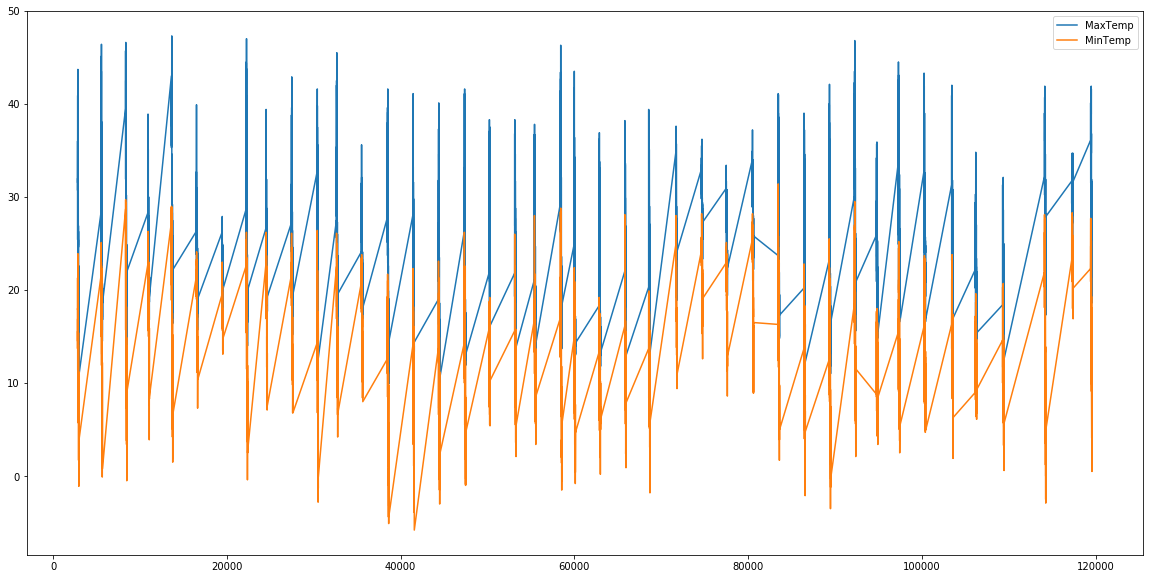

In [15]:
#To Plot a line graph to see the variations in the MaxTemp and MinTemp on a particular year.

class_df_minmax= class_df[(class_df['year'] == 2017)]
# print(class_df_minmax)
class_df_minmax= class_df_minmax.plot( y=['MaxTemp','MinTemp'],figsize=(20,10))

In the second graph I have visualized the Pressure at 9am and pressure at 3pm for every month. 

    month  Pressure3pm  Pressure9am
0       1  1010.546051  1012.730731
1       2  1012.332937  1014.475334
2       3  1014.544008  1016.752361
3       4  1017.066476  1019.676178
4       5  1017.986275  1020.493937
5       6  1018.879515  1021.205061
6       7  1018.709188  1021.108310
7       8  1017.039304  1019.646665
8       9  1015.283179  1018.100726
9      10  1015.905689  1018.370824
10     11  1013.097564  1015.456456
11     12  1011.112574  1013.336908


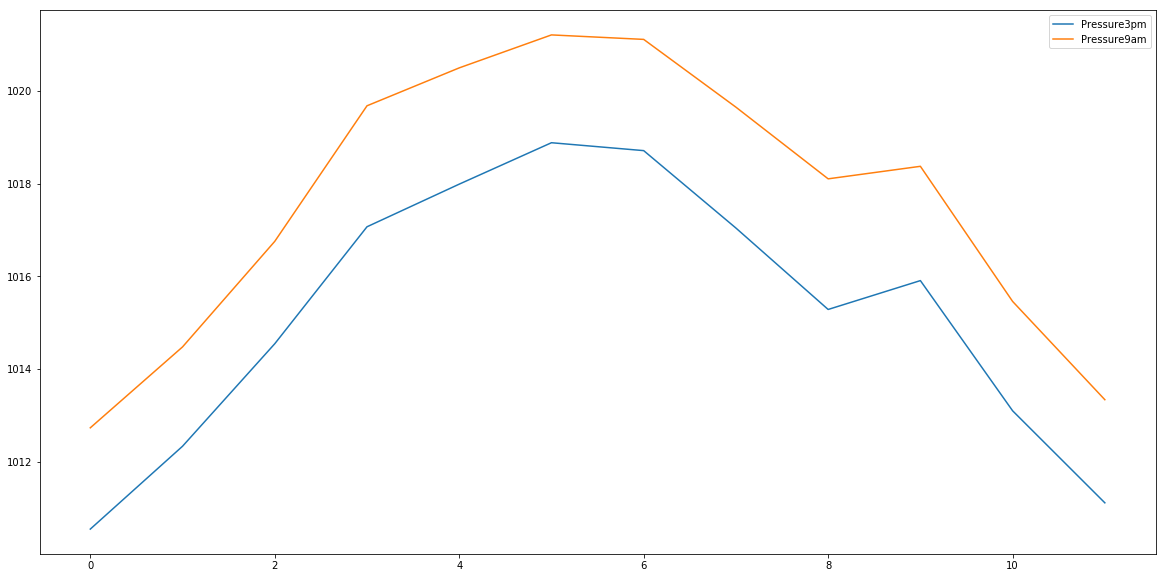

In [16]:
#To plot a line graph to see the mean pressure variance at 9am and 3pm of different locations. 

class_df_p= class_df[['month','Pressure3pm','Pressure9am']].groupby(['month']).mean().reset_index()
print(class_df_p)
class_df_p.plot( y=['Pressure3pm','Pressure9am'],figsize=(20,10))

Finally I have decided to find the correlation between all the feature values and so plotted a correlation matrix using heatmap. 

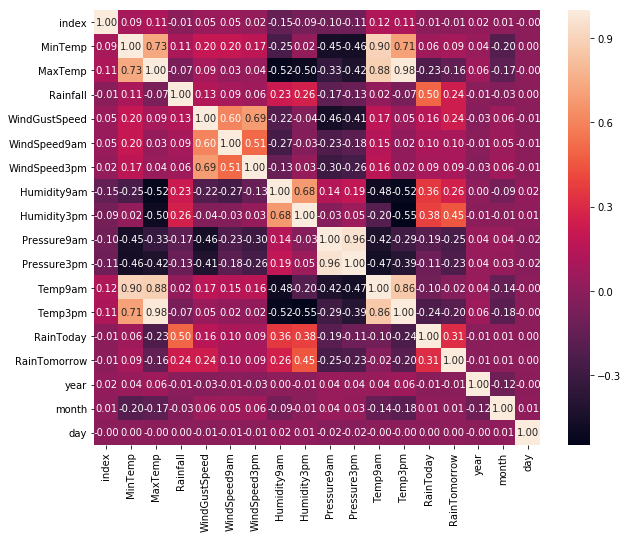

In [17]:
# To plot the correlation matrix which shows the correlation between any two variables.

f, ax = plt.subplots(figsize=(10,8))
corr = class_df.corr()
sns.heatmap(corr, fmt = ".2f",annot = True)



## PRELIMINARY OBSERVATION

The visualization of data set gives you a clear picture of areas that need attention or improvement. It also clarifies which factors influence the behavior.

From the first graph we can infer the variations between the max Temperature and the min Temperature in a particular year. Here I have selected the year'2017' and plotted a line graph where the blue line shows the variation of the max Temperature and the orange line shows the variation of the min Temperature.

From the second graph we can infer the mean pressure for every month at 9am and 3pm. The blue line shows the pressure at 3pm and the yellow line shows the pressure at 9am.

The third graph contains the correlation matrix which provides the correlation between each feature value. We can find the measurement line which shows how much related the two variables will be. Higher the value (red) higher the correlation and vice versa. For example, we can infer that Temperature at 3 am and Max Temperature has higher correlation value which shows they are more correlated.

# III. Method

Summarize the pocket algorithm, discriminant analysis, and logistic regression.
The superclass *Classifier* defines common utility methods. 
Finish the normalize function for you. 
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the 4 classification models 
 - your implementation and description

## SUMMARY

Below are the Summary of four algorithms used in this assignment:

### Pocket Algorithm:

Pocket algorithm is a linear classification algorithm that is derived from the perceptron algorithm. Perceptron algorithm is an algorithm that uses weight vectors along with feature vectors to produce the classification output. For the case of misclassification, the positive class example  $\xv_i$, 

$$
y_i = \wv^{(k)} \xv_i < 0.
$$

To fix this classification error, we want to update the weight $\wv^{(k)}$ to increase the output $y_i$.
Thus, we expect

$$
 \wv^{(k+1)} \xv_i >  \wv^{(k)} \xv_i.
$$

This can be reached by using $\xv_i$ as a gradient as follows: 

$$
\wv^{(k+1)} = \wv^{(k)} + \alpha \xv_i
$$

where $\alpha$ is the learning rate. 

When the sample $t_i$ is negative, we need to do the opposite

$$
 \wv^{(k+1)} \xv_i <  \wv^{(k)} \xv_i.
$$

To combine both positive and negative cases, we can use the target sample $t_i$ in our update, 

$$
\wv^{(k+1)} = \wv^{(k)} + \alpha t_i \xv_i
$$

When the data is not linearly separable, there is no guarantee on convergence. Thus, for training, we need to set the maximum number of iteration. Also, the algorithm selects an arbitrary hyperplane that divides two classes, so it is possible to discover a decision boundary that is not the best.To overcome this uncertainity we have used the pocket algorithm which is an extension of the percepton algorithm.

Here there is a problem of stability as the weight is constantly updated in every loop and there no "best weight".So pocket algorithm came over that limitation and kept track of the best weight seen so far in its starage and only updated the weight if the current weight was better than the previous weight. Thus the  $w_{pocket}$ will contain the best solution so far. 


### Quadratic Discriminant Analysis:


When we have a binary classification problem, $k \in \{-1, +1\}$, we have a higher posterior probability $P(T = +1 \mid \xv)$ for the sample $\xv$ with the positive label. Thus, 

$$
P(T = +1 \mid \xv) > P(T = -1 \mid \xv).
$$

The inequality will be the opposite in case of the negative samples. 

To build our model to meet this expectation, we need to apply algebraic transformation using inequality and gaussian assumptions. And by applying logarithm we can remove the exponent and multiplication for easier computation. 

$$
-\frac{1}{2} \ln \vert \boldsymbol\Sigma_+ \vert - \frac{1}{2} (\xv - \boldsymbol\mu_+)^\top \boldsymbol\Sigma_+^{-1} (\xv - \boldsymbol\mu_+) + \ln P(T = +1) > -\frac{1}{2} \ln \vert \boldsymbol\Sigma_- \vert - \frac{1}{2} (\xv - \boldsymbol\mu_-)^\top \boldsymbol\Sigma_-^{-1} (\xv - \boldsymbol\mu_-) + \ln P(T = -1)
$$

From the observation that both terms have the same cosmetics, we can define the discriminant function $\delta_k(\xv)$ as

$$
\delta_k(\xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (\xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$

Now, for a new sample $\tilde{\xv}$, we can predict the label with

$$
y = \arg\max_k \delta_k(\tilde{\xv}). 
$$

The decision boundary is placed where the discriminant functions meet such as $\delta_1 == \delta_2$. 

Since the $\delta_k$ function is quadratic in $\xv$, the decision boundary is quadratic. 
We call this approach as Quadratic Discriminant Analysis (QDA). 

### Linear Discriminant Analysis:

Maintaining the covariance matrix is not cheap. Considering the input dimension $d$, the symmetric covariance meetric contains $\frac{d (d+1)}{2}$. 

Also, the data is undersampled, the resulting class boundary has high chance of overfitting. 

Simply using the same covariance for all the classes, we can reach the **linear discriminant analysis** model, which can overcome the stated problems above. 
Let $\boldsymbol\Sigma_k = \boldsymbol\Sigma$. 

$$
\begin{align*}
\delta_+(\xv) &> \delta_-(\xv) \\
 \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_+ + \ln P(T = +1) &>  \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_- - \frac{1}{2}\boldsymbol\mu_-^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_-  + \ln P(T = -1)
\end{align*}
$$

Unifying the covariance matrix, we can remove the quadratic term in our disciriminant function: 

$$
\delta_k(\xv) = \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
\boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
$$


### Logistic Regression:

Previously we discussed about using least squres to fit on the discrete target for classification.
When dealing with multiple classes, it can cause masking problem that one class estimation is masked by other predictions. 

Now, we consider a linear regression model that directly predicts $P(T=k \mid \xv)$, not the class label $k$. 
We call this approach as **Logistic Regression**. 

Again, let us use the same linear model for regression: 

$$
\kappa = f(\xv ; \wv) = \Xm \wv.
$$

Thus,

$$
P(T=k \mid \xv) = h(\Xm \wv) = h(\kappa) = \yv.
$$
### Gradient Descent

As we practiced in least mean squares, we need to update the weight $\wv$ with the gradient:

$$
\wv \leftarrow \wv - \alpha \nabla_\wv E(\wv).
$$
with the learning rate $\alpha$. 


### Softmax Transformation

Before computing the derivative, let us select the function $h(\cdot)$. 

Since $P(T=k \mid \xv)$ is probability function, it satisfies 

- the outputs are non-negative,

- the integral of the probability is one. 

To ensure this,

$$
P(T=k \mid \xv) = \frac{\kappa_k}{\sum_{c=1}^K \kappa_c}
$$

Since we are working with the logarithm, an exponent is a good idea.

$$
g_k(\xv) = P(T=k \mid \xv) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

This function is called as **softmax function**. This generalizes the logistic sigmoid fuunction and the derivatives are given by itself

$$
\frac{\partial g_k}{\partial y_j}  = g_k (I_{kj} - g_j).
$$



### Partitioning of data into train and test set

In [18]:
class_df = class_df.loc[:, ~class_df.columns.isin(['index','Date','Location','MinTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','year','month','day'])]
X2 = class_df.iloc[:,class_df.columns != 'RainToday']
T = class_df.iloc[:, class_df.columns == 'RainToday']
X2 = X2.values
T = T.values


In [19]:
# now partition the data 

""" partitioning data

    parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

In [20]:
Xlst, Tlst = partition(pd.DataFrame(X2), pd.DataFrame(T))

X_train, X_test = [xx.as_matrix() for xx in Xlst]
Y_train, Y_test = [tt.as_matrix() for tt in Tlst]

C:\Users\Anju\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anju\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


### A. Super Classs Definition

In [21]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ 
            To Standardize the input X 
        """     
        if not isinstance(X, np.ndarray): 
            
            X = np.asanyarray(X)
        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)
        
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    def confusion_matrix(self,Y,T):
        """
        Y    ndarray
             predicted labels
        T    ndarray
             target labels
             
        @cfm DataFrame
             confusion matrix
        """
    
        if len(Y) != len(T):
            raise ValueError("Wrong prediction and target length!")
    
        classes = np.unique(T)         
        n_classes = len(classes) 
        cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)  
        Tidx = [T == c for c in classes]       
        for c in classes:
            pred_idx = Y == c
            cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]  
        return cfm
    
    def precision(self,cfm):
        return cfm[1][1]/(cfm.sum(axis=1)[1])
    
    def recall(self,cfm):
        return cfm[1][1]/(cfm.sum(axis=0)[1])
    
    
    
        
    
    
    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

## Pocket Algorithm

### EXPLANATION OF CODE
Pocket algorithm is a linear classification algorithm that is derived from the perceptron algorithm. Perceptron algorithm is an algorithm that uses weight vectors along with feature vectors to produce the classification output.

Here in class PocketAlgorithm has four functions,

__init__(self): This function is used to declare the variables that are used inside the class - alpha and w_pocket.

compare(self, X,T,w,wp): This function is used to compares and returns 1 if more number of y values are are equal to T when compared with yp values. 

train(self,X,T): In this function the train data set is first normalized and then the weight matrix is initialized with zero. It gets trained by continuously fixing the error and updating the weights in the pocket.

use(self, X) : This function returns the weight that is stored in the pocket which is the weight which gives the best results.



In [22]:
from copy import deepcopy as copy 

class PocketAlgorithm(Classifier):
    """
        Pocket Algorithm class 
        
        Attributes
        ==========
        w_pocket    ndarray
                    weight vector/matrix
        aplha       float
                    Learning rate
    """
    
    def __init__ (self,alpha):
        Classifier.__init__(self)
        
        """
            pocket weight vector w_pocket is initialized as None
        """
        self.w_pocket = None        
        
        self.alpha = alpha     
    def compare(self, X, T, w , wp):
        
        y = np.sign(X @ w) 
        yp = np.sign(X @ wp)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self, X, T):  
        maxiter = 1000
        
        Xs = self.normalize(X)   
        X1 = self.add_ones(Xs)  
        N = X1.shape[0]        
        w = np.zeros(X1.shape[1])
        self.w_pocket = copy(w) 
        print("\n w_pocket: ",self.w_pocket)
            
        for i in range(maxiter):
            converged = True
            
            for k in np.random.permutation(N):    
                y = w @ X1[k]                  
                if np.sign(y) != np.sign(T[k]):
                    w += self.alpha * T[k] * X1[k]
                    converged = False                 
                    if self.compare(X1, T, w, self.w_pocket) > 0:
                        self.w_pocket[:] = w[:] 
                        
            if converged:               
                print( "Converged at ", i)
                break
                
        print("End of Training at ", i)
    
    def use(self, X):
        
        print("\n w_pocket: ",self.w_pocket)
        Xs = self.normalize(X)  
        X1 = self.add_ones(Xs) 
        Y = X1 @ self.w_pocket
        print("\n Y: ",Y)
        print("\n Y: ",np.sign(Y))
        return np.sign(Y)

## C. QDA

### EXPLANATION OF CODE

Quadratic classifier is used in machine learning and statistical classification to separate measurements of two or more classes of objects or events by a quadric surface. It is a more general version of the linear classifier.
 
The QDA class contains three functions,

__init__(self): This function is used to declare variables that are used within the class.

train(self,X,T): This function initially normalizes the values in the trained data set. Then we get the target data set and iterate throught the values in the target data set and test how many values are similar.

use(self,X): This function has a discriminant funciton which returns the class with maximum probability.

In [23]:
from mpl_toolkits.mplot3d import Axes3D
class QDA(Classifier):
    """ 
        Quadratic Discriminant Analysis         
             
    """
    def __init__(self):
        Classifier.__init__(self)
    
    def train(self, X, T):
        self.prior = []     
        self.sigma = []  
        self.mu = []  
        
        # Normalize X
        Xs = self.normalize(X)     
        N = Xs.shape[0]
        self.classes = np.unique(T) 
        for i in (self.classes):
            contains = np.where(T == i)[0]
            self.prior.append(len(contains)/N) 
            if contains.any():
                sigma1 = np.cov(Xs[contains].T)
                self.sigma.append(copy(sigma1)) 
                mu1 = Xs[contains].mean(0)                
                self.mu.append(copy(mu1)) 

    def use(self,X):
        # Discriminant function
        self.d = []       
        Xs = self.normalize(X) 
        for k in range(len(self.classes)):
            
            D = Xs.shape[1]
            detSigma = self.sigma[k] if D == 1 else np.log(np.linalg.det(self.sigma[k]))
            diff = Xs - self.mu[k].T 
            # inverse of the sigma
            sigmaI = 1.0/self.sigma[k] if D == 1 else np.linalg.inv(self.sigma[k])
            self.d.append(-0.5 * detSigma - 0.5 * np.sum(np.dot(diff,sigmaI)*diff, axis= 1) + np.log(self.prior[k]))
        return self.d

### D. LDA

Linear Discriminant Analysis is used in Machine Learning for classification to find a linear combination of features that characterizes or separates two or more classes of objects or events.

The LDA class has three functions, 

__init__(self): The variables that are used within the class are declared in this function.

train(self, X, T): In this function the trained data set is initially normalized. Later the covariance is calculated and iterate through the unique values in the dataset to test if each value in the 1-D array is also present in a second array. Finally check through all the true instances resulted in comparison and find the probability.

use(self,X): The discriminant function is used to return the class with highest probability.


In [24]:
from mpl_toolkits.mplot3d import Axes3D
class LDA(Classifier):
    """ 
        Linear Discriminant Analysis         
             
    """
    def __init__(self):
        Classifier.__init__(self)
    
    def train(self, X, T):
        self.prior = []      
        self.sigma = [] 
        self.mu = []  
        
        # Normalize X
        Xs = self.normalize(X)
        N = Xs.shape[0]
        self.sigma = np.cov(Xs.T)
        self.classes = np.unique(T)  
        for i in self.classes:
            contains = np.where(T == i)[0]
            self.prior.append(len(contains)/N) 
           
            if contains.any(): 
                mu1 = Xs[contains].mean(0)
                self.mu.append(copy(mu1))
    def use(self,X):
        self.d = [] 
        Xs = self.normalize(X) 
        for j in range(len(self.classes)):
            
            D = Xs.shape[1]
            detSigma = self.sigma if D == 1 else np.log(np.linalg.det(self.sigma))    
            diff = Xs - self.mu[j].T 
            sigmaI = 1.0/self.sigma if D == 1 else np.linalg.inv(self.sigma)
            self.d.append(np.sum(np.dot(X, sigmaI)*self.mu[j] - 0.5 * np.dot(self.mu[j],sigmaI)*self.mu[j] + np.log(self.prior[j]), axis =1))
        return self.d

### E. Logistic Regression

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

The LogisticRegression class contains three functions,

__init__(self):This functions contains variables that are declared and used within the class. 

softmax(self,z): The softmax function are commonly trained under a log loss (or cross-entropy) regime, giving a non-linear variant of multinomial logistic regression.

train(self,X, T): In this function the data is initially normalized. This train function gets the classes from the target data set and also gets the number of dimiensions and features.Using this it calculates the probablity value that can be mapped to two or more classes. 

use(self, X) : This function returns the probability value that can be mapped to two or more classes.

In [25]:
class LogisticRegression(Classifier): 
    """ 
        Logistic Regression class 
        
        attributes
        ===========
        w_pocket    ndarray
                    weight vector/matrix
        aplha       float
                    Learning rate        
    """
    
    def __init__(self,alpha):
        Classifier.__init__(self)
        
        """
            weight vector w is initialized as None
        """
        self.w = None
        self.alpha = alpha 
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    # the softmax function
    def g(self,X, w):
        return self.softmax(X @ w) 
        
    def train(self, X, T):
        niter = 10
        
        # Normalize X
        Xs = self.normalize(X)
        X1 = self.add_ones(Xs)
        self.classes = np.unique(T)  
        K = len(self.classes) 
        
        N = X1.shape[0]        
        D = X1.shape[1] 
        
        print("\n X: ",X)
        print("\n Xs: ",Xs)
#       print("\n T: ",T)
        print("\n N: ",N)
        print("\n D: ",D)
        print("\n K: ",K)      
        self.w = np.random.rand(D, K)
        print("\n w: ",self.w)

        T = self.add_ones(T.reshape(-1,1))        
        for step in range(niter):
                print("\n Iteration: ", step)
                ys = self.g(X1,self.w)
                print("\n ys Shape: ",ys.shape)
                self.w += self.alpha * X1.T @ (T - ys)   
                print("\n self.w: ",self.w)
    
    def use(self, X):
        print("\n w: ",self.w)
        Xs = self.normalize(X) 
        X1 = self.add_ones(Xs)
        return self.g(X1, self.w)

## IV : EXPERIMENTS

### Pocket Algorithm Visualization

The pocket algorithm is called and visualized. It is initially trained with 300 data values and tested with 300 data values.


 w_pocket:  [ 0.  0.  0.  0.  0.  0.  0.]
End of Training at  999

 w_pocket:  [-0.25       -0.29710624 -0.0911576   0.13103246  0.18085349  0.12421613
  0.02341465]

 Y:  [-0.27439166 -0.2736959  -0.15410572 -0.26391019 -0.18274064 -0.2592078
 -0.26020906 -0.10346717 -0.17383449 -0.19692236 -0.1577203  -0.24882602
 -0.18323875 -0.13042897 -0.25085923 -0.09972311 -0.21585222 -0.11542117
 -0.18993934 -0.18464317 -0.089897   -0.17917728 -0.07224014 -0.21184519
 -0.24707629 -0.24997472 -0.24442511 -0.29679084 -0.1502949  -0.21623403
 -0.21662805 -0.16679565 -0.20224686 -0.2225236  -0.22822319 -0.18481117
 -0.21675523 -0.12533119 -0.11723909 -0.20124364 -0.12504818 -0.11317065
 -0.13943933 -0.24881934 -0.19699129 -0.27583664 -0.23563247 -0.12510655
 -0.20525365 -0.21214458 -0.31552494 -0.20544258 -0.20803187 -0.04266144
 -0.12174335 -0.28363181 -0.46584498 -0.08889707 -0.12811859 -0.21863928
 -0.26743223 -0.29230425 -0.19847398 -0.14480463 -0.18128337 -0.28813037
 -0.1852914  -0.2169091  

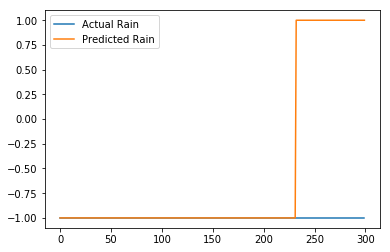

In [26]:
pocket = PocketAlgorithm(0.05)
pocket.train(X_train[:300], Y_train[:300])
value = pocket.use(X_test[:300])
plt.clf()
plt.plot(np.sort(value,0), label ='Actual Rain')
# print("\n value: ",value)
plt.plot(np.sort(Y_test[:300],0), label = 'Predicted Rain')
plt.legend()
plt.show()



The confusion matrix, precision, recall, accuracy is calculated. 

In [27]:
cmatrix = pocket.confusion_matrix(value,Y_test[:300])
print("\n Confusion Matrix: ",cmatrix)

precision = pocket.precision(cmatrix)
print("\n Precision: ",precision)

recall = pocket.recall(cmatrix)
print("\n Recall: ",recall)

accuracy = (cmatrix[-1][-1] + cmatrix[1][1])/ (cmatrix.sum(axis=0)[-1]+cmatrix.sum(axis=0)[1]) * 100
print("\n Accuracy: ", accuracy)




 Confusion Matrix:         -1      1
-1  69600  20400
 1      0      0

 Precision:  nan

 Recall:  0.0

 Accuracy:  77.3333333333


C:\Users\Anju\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in true_divide


### Quadratic Discriminant Analysis Visualization

The QDA algorithm is called and the output is visualized. It is trained with 600 data values and tested with 400 data values.

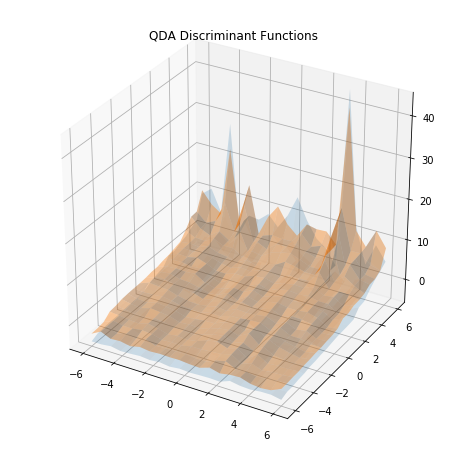

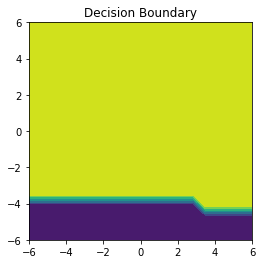

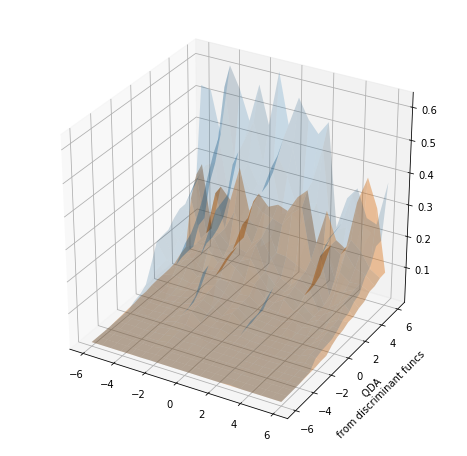

In [28]:
qda_class = QDA()
qda_class.train(X_train[:600], Y_train[:600])

# Compute the discriminant function on test data
disc = qda_class.use(X_test[:400])
xm, ym = np.meshgrid(np.linspace(-6,6,20), np.linspace(-6,6,20))

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xm, ym, np.sort(-1 * disc[0].reshape(xm.shape),0), alpha = 0.2)
ax.plot_surface(xm, ym, np.sort(-1 * disc[1].reshape(xm.shape),0), alpha = 0.4)
plt.title("QDA Discriminant Functions")


plt.figure(figsize=(4,4))
plt.contourf(xm, ym, (np.sort(disc[0]- disc[1], 0)>0).reshape(xm.shape))
plt.title("Decision Boundary")
plt.show()

# Plot generative distributions starting with discriminant functions
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
prob1 = np.exp( np.sort(disc[0].reshape(xm.shape),0) - 0.5* X_train.shape[1]* np.log(2*np.pi) - np.log(qda_class.prior[0]))
prob2 = np.exp( np.sort(disc[1].reshape(xm.shape),0) - 0.5* X_train.shape[1]* np.log(2*np.pi) - np.log(qda_class.prior[1]))
ax.plot_surface(xm, ym, prob1, alpha=0.2)
ax.plot_surface(xm, ym, prob2, alpha=0.4)
plt.ylabel("\n QDA \n from discriminant funcs", multialignment="center")
plt.show()


The output of QDA is calculated and displayed. 

In [29]:
D = np.argmax(disc, axis=0)
print("\n D: ", D)

output = [qda_class.classes[t] for t in D]
print("\n Output: ", output)


 D:  [0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

 Output:  [-1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1

The confusion matrix, precision, recall and accuracy is calculated. 

In [30]:
cmatrix = qda_class.confusion_matrix(output,Y_test[:400])
print("\n Confusion matrix: ",cmatrix)

precision = qda_class.precision(cmatrix)
print("\n Precision: ",precision)

recall = qda_class.recall(cmatrix)
print("\n Recall: ",recall)

accuracy = (cmatrix[-1][-1] + cmatrix[1][1])/ (cmatrix.sum(axis=0)[-1]+cmatrix.sum(axis=0)[1]) * 100
print("\n Accuracy: ", accuracy)





 Confusion matrix:          -1      1
-1  100425  29575
 1   23175   6825

 Precision:  0.2275

 Recall:  0.1875

 Accuracy:  67.03125


### Linear Discriminant Analysis Visualization

The LDA algorithm is called and the output is visualized. It is trained with 600 data values and tested with 400 data values. 

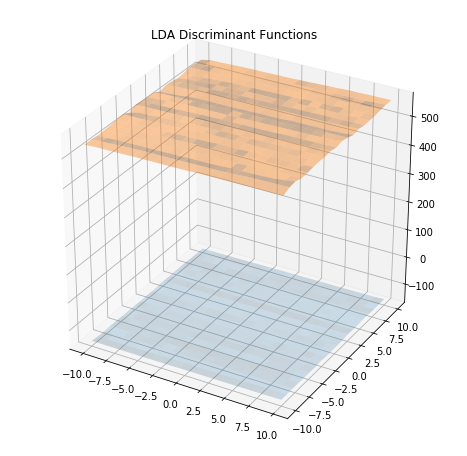

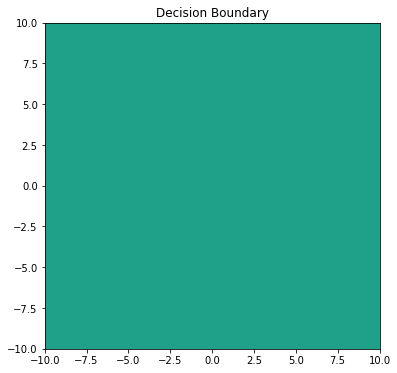

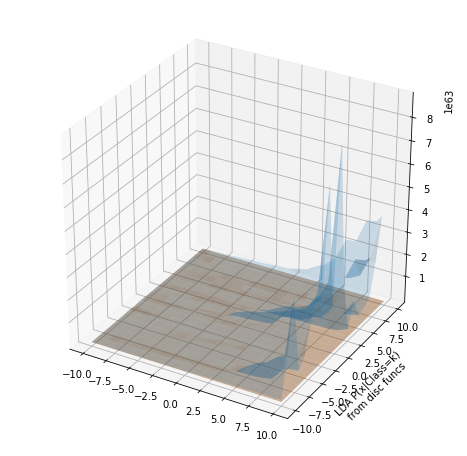

In [31]:
lda_class = LDA()

## compute the mean and covariance
lda_class.train(X_train[:600], Y_train[:600])

## now compute the discriminant function on test data
disc = lda_class.use(X_test[:400])
# print("\n d: ", disc)

xm, ym = np.meshgrid(np.linspace(-10,10, 20), np.linspace(-10,10, 20))
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xm, ym, np.sort(-1 *disc[0].reshape(xm.shape)), alpha=0.2)
ax.plot_surface(xm, ym, np.sort(-1 *disc[1].reshape(xm.shape)), alpha=0.4)
plt.title("LDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xm, ym, (np.sort(disc[0]-disc[1]) > 0).reshape(xm.shape))
plt.title("Decision Boundary")

# Plot generative distributions  p(x | Class=k)  starting with discriminant functions
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
prob1 = np.exp( np.sort(disc[0].reshape(xm.shape)) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(lda_class.prior[0]))
prob2 = np.exp( np.sort(disc[1].reshape(xm.shape)) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(lda_class.prior[1]))
ax.plot_surface(xm, ym, prob1, alpha=0.2)
ax.plot_surface(xm, ym, prob2, alpha=0.4)
plt.ylabel("LDA P(x|Class=k)\n from disc funcs", multialignment="center")
plt.show()


The output of LDA is calculated.

In [32]:
D = np.argmax(disc, axis=0)
print("\n D: ", D)

output = [lda_class.classes[t] for t in D]
print("\n Output: ", output)


 D:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

 Output:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

The confusion matrix, precision, recall and accuracy is calculated

In [33]:

cmatrix = lda_class.confusion_matrix(output,Y_test[:400])
print("\n Confusion Matrix: ",cmatrix)

precision = lda_class.precision(cmatrix)
print("\n Precision: ",precision)

recall = lda_class.recall(cmatrix)
print("\n Recall: ",recall)

accuracy = (cmatrix[-1][-1] +cmatrix[1][1])/ (cmatrix.sum(axis=0)[-1]+cmatrix.sum(axis=0)[1]) * 100
print("\n Accuracy: ", accuracy)




 Confusion Matrix:          -1      1
-1  123600  36400
 1       0      0

 Precision:  nan

 Recall:  0.0

 Accuracy:  77.25


C:\Users\Anju\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in true_divide


### Logistic Regression 

The LogisticRegression algorithm is called and the output is visualized. It is trained with 500 data values and tested with 400 data values.

In [34]:
LogisticReg_class = LogisticRegression(0.1)
LogisticReg_class.train(X_train[:500],Y_train[:500])

value = LogisticReg_class.use(X_test[:400])


print("\n X_test: ",np.unique(X_test[:400]))
print("\n Y: ",value)

Y_log = np.argmax(value, 1)
print("\n Y_log: ",Y_log)

T_log = np.argmax(Y_test[:400], 1)


output = [LogisticReg_class.classes[t] for t in T_log]
print("\n Output: ", output)





 X:  [[  2.29000000e+01   1.00770000e+03   1.00710000e+03   1.69000000e+01
    2.18000000e+01  -1.00000000e+00]
 [  2.51000000e+01   1.01060000e+03   1.00780000e+03   1.72000000e+01
    2.43000000e+01  -1.00000000e+00]
 [  2.57000000e+01   1.00760000e+03   1.00870000e+03   2.10000000e+01
    2.32000000e+01  -1.00000000e+00]
 ..., 
 [  1.45000000e+01   1.01610000e+03   1.01550000e+03   9.30000000e+00
    1.45000000e+01  -1.00000000e+00]
 [  1.53000000e+01   1.02230000e+03   1.02160000e+03   1.08000000e+01
    1.53000000e+01  -1.00000000e+00]
 [  1.75000000e+01   1.02470000e+03   1.02170000e+03   1.02000000e+01
    1.68000000e+01  -1.00000000e+00]]

 Xs:  [[-0.19590249 -1.35541176 -1.06348208  0.20168946 -0.18548135 -0.50624244]
 [ 0.07393565 -0.93284735 -0.95894094  0.24876916  0.12996312 -0.50624244]
 [ 0.14752787 -1.36998294 -0.8245309   0.8451121  -0.00883245 -0.50624244]
 ..., 
 [-1.22619357 -0.1314321   0.1910116  -0.99099642 -1.10657919 -0.50624244]
 [-1.12807061  0.77198145  1.1

The output is visualized. 

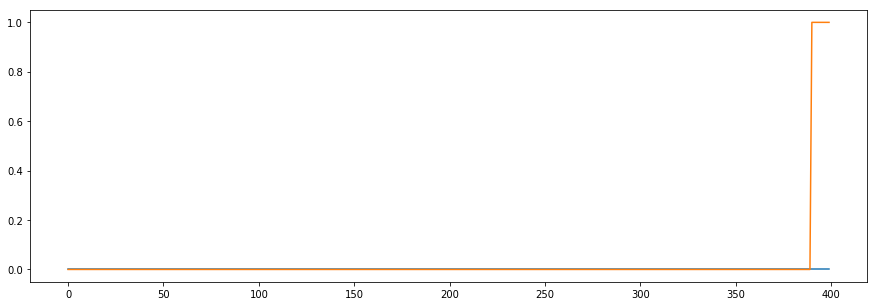


 Output:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

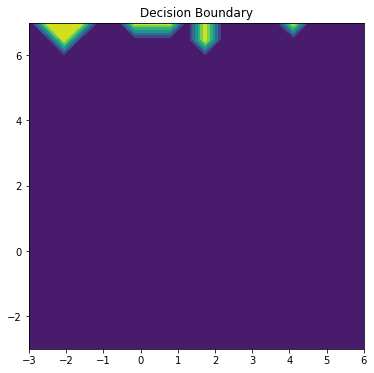

In [35]:

plt.figure(figsize=(15,5))
plt.plot(np.sort(T_log,0))
plt.plot(np.sort(Y_log,0))
plt.show()

x = np.linspace(-3, 6,20)
y = np.linspace(-3, 7,20)
xm, ym = np.meshgrid(x, y)
plt.figure(figsize=(6,6))
plt.contourf(xm, ym, np.sort(Y_log.reshape(xm.shape),0))
plt.title("Decision Boundary")

output = [LogisticReg_class.classes[t] for t in T_log]
print("\n Output: ", output)

The confusion matrix, precision, recall and accuracy is calculated. 

In [36]:
cmatrix = LogisticReg_class.confusion_matrix(output,Y_test[:400])
print("\n Confusion Matrix: ", cmatrix)

precision = LogisticReg_class.precision(cmatrix)
print("\n Precision: ",precision)

recall =LogisticReg_class.recall(cmatrix)
print("\n Recall: ",recall)

accuracy = (cmatrix[-1][-1] + cmatrix[1][1])/ (cmatrix.sum(axis=0)[-1]+cmatrix.sum(axis=0)[1]) * 100 
print("\n Accuracy: ", accuracy)


 Confusion Matrix:          -1      1
-1  123600  36400
 1       0      0

 Precision:  nan

 Recall:  0.0

 Accuracy:  77.25


C:\Users\Anju\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in true_divide


### MODEL COMPARISON : 

From the above calculated accuracy of each algorithm we can find that the Pocket algorithm with accuracy 77.33% has more accuracy that other three algorithm. This shows that the Pocket Algorithm is the best fit model. 

This is because the pocket algorithm calculates the weight at each step and stores it in the pocket and finally returns the weight that is stored in the pocket.

Though not as flexible as LDA, QDA can perform better in the presence of a limited number of training observations because it does make some assumptions about the form of the decision boundary.


 ## CONCLUSIONS

This assignment gave me a clear view about the Classification concept. It also helped me to classify the data with various classifications algorithms.

It also taught me the concepts of Pocket Algorithm, Quadratic Discriminant Analysis algorithm, Linear discriminant analysis algorithm and Logistic Regression. 

This was a great hands on assignment to work with the Classification models. 

Over all I got to learn how to classify the data and visualize them. 

## REFRENCES:

[1] The Jupyter Notebook provided by professor Lee 
https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Classification.sol.ipynb#

[2] The Jupyter Notebook provided by professor Lee 
https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Classification.sol.ipynb

[3] SciPy Learn, numpy.linalg.lstsq,  "https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html"

[4] Pandas 0.24.0 documentation » API Reference » DataFrame » pandas.DataFrame » pandas.DataFrame.plot. General Writing FAQs.Retrieved from "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html".

[5] Pandas 0.24.0 documentation » API Reference » DataFrame » pandas.iloc » pandas.DataFrame.iloc. General Writing FAQs.Retrieved from "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html".

[6] SciPy Learn, numpy.ndarray.shape, "https://docs.scipy.org/doc/numpy-1.14.5/reference/generated/numpy.ndarray.shape.html"

